# Data Science April Major Project

### Problem Statement
Create a classification model to predict whether a person makes over $50k a year.

## Importing the required libraries

In [1]:
# General

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# ML Models

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Testing

from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Remove warnings

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset to the dataframe

In [2]:
data = pd.read_csv("adult.csv")

## Checking the dataframe

In [3]:
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Checking the size of dataframe

In [4]:
data.shape

(32560, 15)

## Checking the column names

In [5]:
data.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

##### The column names are wrong hence they need to be corrected.

## Correcting the column names

In [6]:
data.columns = ["Age", "Workclass","Fnlwgt","Education",
                "education_num", "marital_status", "occupation",
                "relationship", "race", "sex", "capital_gain",
                "capital_loss", "hours_per_week", "native_country",
                "income"]
data.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Checking the datatypes of features

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### Some features are in object datatype therefore they need to be encoded.

## Finding the unique values of object datatypes

In [8]:
print('\nWork Class\n')
print(*list(data.Workclass.unique()))
print('\nEducation\n')
print(*list(data.Education.unique()))
print('\nmarital_status\n')
print(*list(data.marital_status.unique()))
print('\noccupation\n')
print(*list(data.occupation.unique()))
print('\nrelationship\n')
print(*list(data.relationship.unique()))
print('\nrace\n')
print(*list(data.race.unique()))
print('\nsex\n')
print(*list(data.sex.unique()))
print('\nnative_country\n')
print(*list(data.native_country.unique()))
print('\nincome\n')
print(*list(data.income.unique()))


Work Class

 Self-emp-not-inc  Private  State-gov  Federal-gov  Local-gov  ?  Self-emp-inc  Without-pay  Never-worked

Education

 Bachelors  HS-grad  11th  Masters  9th  Some-college  Assoc-acdm  Assoc-voc  7th-8th  Doctorate  Prof-school  5th-6th  10th  1st-4th  Preschool  12th

marital_status

 Married-civ-spouse  Divorced  Married-spouse-absent  Never-married  Separated  Married-AF-spouse  Widowed

occupation

 Exec-managerial  Handlers-cleaners  Prof-specialty  Other-service  Adm-clerical  Sales  Craft-repair  Transport-moving  Farming-fishing  Machine-op-inspct  Tech-support  ?  Protective-serv  Armed-Forces  Priv-house-serv

relationship

 Husband  Not-in-family  Wife  Own-child  Unmarried  Other-relative

race

 White  Black  Asian-Pac-Islander  Amer-Indian-Eskimo  Other

sex

 Male  Female

native_country

 United-States  Cuba  Jamaica  India  ?  Mexico  South  Puerto-Rico  Honduras  England  Canada  Germany  Iran  Philippines  Italy  Poland  Columbia  Cambodia  Thailand  Ecu

## Converting the object to categorical for encoding

In [9]:
data.Workclass=pd.Categorical(data.Workclass)
data.Education=pd.Categorical(data.Education)
data.marital_status=pd.Categorical(data.marital_status)
data.occupation=pd.Categorical(data.occupation)
data.relationship=pd.Categorical(data.relationship)
data.race=pd.Categorical(data.race)
data.sex=pd.Categorical(data.sex)
data.native_country=pd.Categorical(data.native_country)
data.income=pd.Categorical(data.income)

In [10]:
data.dtypes

Age                  int64
Workclass         category
Fnlwgt               int64
Education         category
education_num        int64
marital_status    category
occupation        category
relationship      category
race              category
sex               category
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country    category
income            category
dtype: object

## Encoding

In [11]:
enc = LabelEncoder()

In [12]:
data.Workclass=enc.fit_transform(data.Workclass)
data.Education=enc.fit_transform(data.Education)
data.marital_status=enc.fit_transform(data.marital_status)
data.occupation=enc.fit_transform(data.occupation)
data.relationship=enc.fit_transform(data.relationship)
data.race=enc.fit_transform(data.race)
data.sex=enc.fit_transform(data.sex)
data.native_country=enc.fit_transform(data.native_country)
data.income=enc.fit_transform(data.income)

In [13]:
data.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


## Checking for null values

In [14]:
data.isnull()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

##### There are no null values in this dataset.

## Checking for duplicates

In [16]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Length: 32560, dtype: bool

In [17]:
data.duplicated().sum()

24

##### There are 24 duplicate values in this dataset so we need to drop them.

## Droping the duplicate values

In [18]:
data = data.drop_duplicates()
data.duplicated().sum()

0

## Defining independent and dependent

In [19]:
X = data.iloc[:,:-1]
y = data.income

## Spliting the data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 27)

## Model training 

The following models will be used:
- a. Decision Tree
- b. Random Forest Classifier
- c. Logistic Regression
- d. KNN Classifier
- e. SVC Classifier (with linear kernel)

## Decision Tree

In [21]:
# Initializing

model_DT = DecisionTreeClassifier()

# Training

model_DT.fit(x_train,y_train)

# Predicting

y_pred_DT = model_DT.predict(x_test)

# Testing

DT_ACCURACY = accuracy_score(y_test,y_pred_DT)
print("The accuracy score is", DT_ACCURACY)
print("The classification report is\n", 
      classification_report(y_test,y_pred_DT))
print("The confusion matrix is\n", 
     confusion_matrix(y_test,y_pred_DT))

The accuracy score is 0.8043233275279172
The classification report is
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      7472
           1       0.58      0.61      0.60      2289

    accuracy                           0.80      9761
   macro avg       0.73      0.74      0.73      9761
weighted avg       0.81      0.80      0.81      9761

The confusion matrix is
 [[6447 1025]
 [ 885 1404]]


## Random Forest

In [22]:
# Initializing

model_RF = RandomForestClassifier()

# Training

model_RF.fit(x_train,y_train)

# Predicting

y_pred_RF = model_RF.predict(x_test)

# Testing
RF_ACCURACY = accuracy_score(y_test,y_pred_RF)
print("The accuracy score is", RF_ACCURACY)
print("The classification report is\n", 
      classification_report(y_test,y_pred_RF))
print("The confusion matrix is\n", 
     confusion_matrix(y_test,y_pred_RF))

The accuracy score is 0.8607724618379264
The classification report is
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7472
           1       0.74      0.62      0.68      2289

    accuracy                           0.86      9761
   macro avg       0.82      0.78      0.79      9761
weighted avg       0.86      0.86      0.86      9761

The confusion matrix is
 [[6983  489]
 [ 870 1419]]


## Logistic Regression

In [26]:
# Initializing

model_LR = LogisticRegression()

# Training

model_LR.fit(x_train,y_train)

# Predicting

y_pred_LR = model_LR.predict(x_test)

# Testing
LR_ACCURACY = accuracy_score(y_test,y_pred_LR)
print("The accuracy score is", LR_ACCURACY)
print("The classification report is\n", 
      classification_report(y_test,y_pred_LR))
print("The confusion matrix is\n", 
     confusion_matrix(y_test,y_pred_LR))

The accuracy score is 0.7983813133900215
The classification report is
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      7472
           1       0.65      0.31      0.42      2289

    accuracy                           0.80      9761
   macro avg       0.73      0.63      0.65      9761
weighted avg       0.78      0.80      0.77      9761

The confusion matrix is
 [[7084  388]
 [1580  709]]


## KNN

In [23]:
# Initializing

model_KNN= KNeighborsClassifier(n_neighbors = 5, 
                                metric = 'minkowski', p = 2)

# Training

model_KNN.fit(x_train, y_train)

# Predicting

y_pred_KNN = model_KNN.predict(x_test)

# Testing

KNN_ACCURACY = accuracy_score(y_test,y_pred_KNN)
print("The accuracy score is", KNN_ACCURACY)
print("The classification report is\n", 
      classification_report(y_test,y_pred_KNN))
print("The confusion matrix is\n", 
     confusion_matrix(y_test,y_pred_KNN))

The accuracy score is 0.7777891609466243
The classification report is
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      7472
           1       0.54      0.32      0.40      2289

    accuracy                           0.78      9761
   macro avg       0.68      0.62      0.63      9761
weighted avg       0.75      0.78      0.76      9761

The confusion matrix is
 [[6862  610]
 [1559  730]]


## SVM

In [24]:
# Initializing

model_SVC = SVC()

# Training

model_SVC.fit(x_train,y_train)

# Predicting

y_pred_SVC = model_SVC.predict(x_test)

# Testing
SVC_ACCURACY = accuracy_score(y_test,y_pred_SVC)
print("The accuracy score is", SVC_ACCURACY)
print("The classification report is\n", 
      classification_report(y_test,y_pred_SVC))
print("The confusion matrix is\n", 
     confusion_matrix(y_test,y_pred_SVC))

The accuracy score is 0.8015572174982072
The classification report is
               precision    recall  f1-score   support

           0       0.79      1.00      0.89      7472
           1       1.00      0.15      0.27      2289

    accuracy                           0.80      9761
   macro avg       0.90      0.58      0.58      9761
weighted avg       0.84      0.80      0.74      9761

The confusion matrix is
 [[7471    1]
 [1936  353]]


## COMPARING THE PERFORMANCE

In [27]:
Accuracy_score = [KNN_ACCURACY, SVC_ACCURACY, LR_ACCURACY,
                 DT_ACCURACY, RF_ACCURACY]
Models = ['KNN', 'SVC', 'Logistic Regression',
          'Decision Tree','Random Forest']

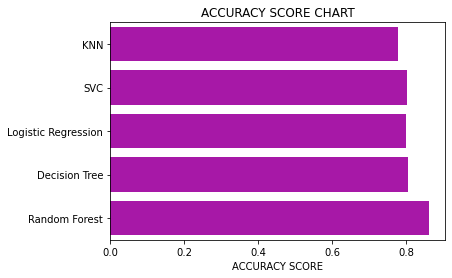

In [28]:
sn.barplot(Accuracy_score, Models, color="m")
plt.xlabel('ACCURACY SCORE')
plt.title('ACCURACY SCORE CHART')
plt.show()

##### It is vivid that Random forest has the highest accuracy score. Therefore, Random forest gives the best result for this data set.